In [1]:
import os
import numpy as np
from netCDF4 import Dataset
from matplotlib import pyplot as plt
from pynextsim.gmshlib import GmshMesh
from pynextsim.projection_info import ProjectionInfo

In [2]:
osi_proj = ProjectionInfo.osisaf_nsidc_np_stere()
with Dataset('ice_conc_nh_polstere-100_multi_201702201200.nc', 'r') as ds:
    sic = ds.variables['ice_conc'][0].filled(np.nan)
    lon = ds.variables['lon'][:]
    lat = ds.variables['lat'][:]
x, y = osi_proj.pyproj(lon, lat)

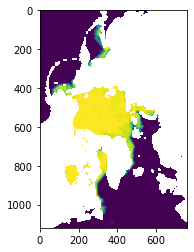

In [3]:
plt.imshow(sic)
plt.show()

In [4]:
gmo = GmshMesh('medium_arctic_10km.msh', projection=osi_proj)
mask = ~gmo.boundary.iswet(x, y)
sic2 = np.copy(sic)
sic2[mask] = np.nan

Reading medium_arctic_10km.msh...

Finished reading medium_arctic_10km.msh.



In [5]:
ii, jj = np.where(~mask)
bbox = ii.min(), ii.max(), jj.min(), jj.max()
bbox

(375, 780, 151, 670)

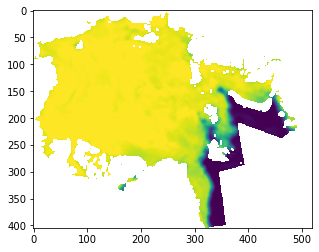

In [6]:
i0, i1, j0, j1 = bbox
sic_ = sic2[i0:i1, j0:j1]
plt.imshow(sic_)
plt.show()

In [7]:
np.savez('OSISAF_medium_arctic_mask.npz', mask=mask[i0:i1, j0:j1], bbox=np.array(bbox, dtype=int))